# Recommender System

Developing a very simple movie recommender system in Python that uses the correlation between the ratings assigned to different movies. Thus, we will find the similarity between the movies.

In [1]:
#import the basic libraries and import the data.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#explore ratings file
ratings_file = 'D:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\Movies\\ratings.csv'
df_ratings = pd.read_csv(ratings_file)
df_ratings.head()

userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523

There is one problem with this dataset. It contains the IDs of the movies but not their titles. We will need movie names of the movies to recommend. The movie names are stored in the movies.csv file.

In [3]:
movies_file = 'D:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\Movies\\movies.csv'
df_movies = pd.read_csv(movies_file)
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.

In [4]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data.head()

userId  movieId  rating   timestamp          title       genres
0       1       16     4.0  1217897793  Casino (1995)  Crime|Drama
1       9       16     4.0   842686699  Casino (1995)  Crime|Drama
2      12       16     1.5  1144396284  Casino (1995)  Crime|Drama
3      24       16     4.0   963468757  Casino (1995)  Crime|Drama
4      29       16     3.0   836820223  Casino (1995)  Crime|Drama

Now let's take a look at the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie. We will then display the first five movies along with their average rating using the head() method as follows:

In [5]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

We can see that the average ratings are not sorted. Let's sort the ratings in the descending order of their average ratings:

In [6]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

In [7]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

We will create a new dataframe called ratings_mean_count and first add the average rating of each movie to this dataframe as follows-

In [8]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

Next up, we will add the number of ratings for a movie to the ratings_mean_count dataframe as follows-

In [10]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

rating  rating_counts
title                                                         
'71 (2014)                                3.500              1
'Hellboy': The Seeds of Creation (2004)   3.000              1
'Round Midnight (1986)                    2.500              1
'Til There Was You (1997)                 4.000              3
'burbs, The (1989)                        3.125             20

Now, let's plot a histogram for the number of ratings represented by the rating_counts column in the above dataframe.

<AxesSubplot:>

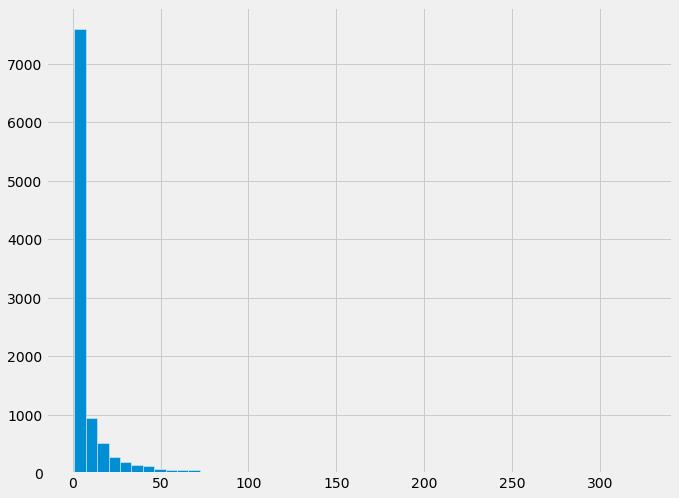

In [11]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

From the above plot, we can see that most of the movies have received less than 50 ratings and there are no movies having more than 100 ratings.

Now, we will plot a histogram for average ratings.

<AxesSubplot:>

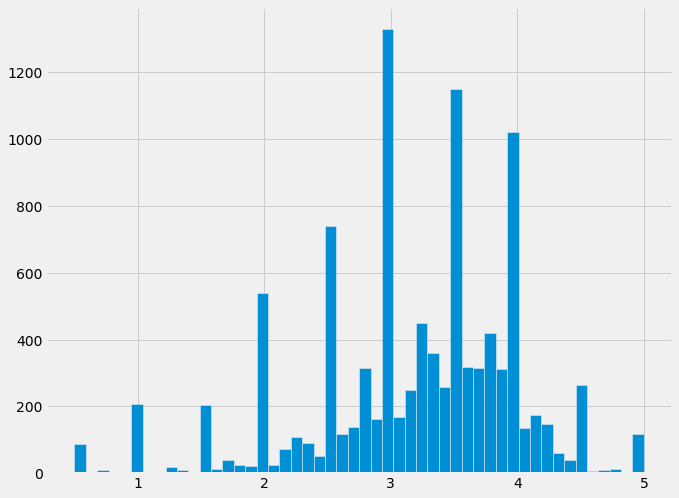

In [12]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

Movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating.

Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings.

<Figure size 720x576 with 0 Axes>

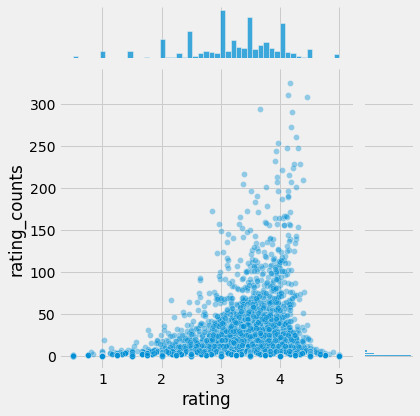

In [13]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

# Finding Similarities Between Movies 

Now, it is the time to find the similarity between the movies.

We will use the correlation between the ratings of a movie as the similarity metric.

To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.

This matrix will have a lot of null values since every movie is not rated by every user.

We will create the matrix of movie titles and corresponding user ratings.

In [15]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

user_movie_rating.head()

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Til There Was You (1997)  'burbs, The (1989)  \
userId                                                                          
1                          NaN                        NaN                 NaN   
2                          NaN                        NaN                 NaN   
3                          NaN                        NaN                 NaN   
4                          NaN                        NaN                 NaN   
5                          NaN                        NaN                 NaN   

title   'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                      
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   

title   *batteries not included (1987)  ...And Justice for All (1979)  \
userId                                                                  
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   
5                                  NaN                            NaN   

title   10 (1979)  ...  [REC] (2007)  [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId             ...                                                         
1             NaN  ...           NaN            NaN                      NaN   
2             NaN  ...           NaN            NaN                      NaN   
3             NaN  ...           NaN            NaN                      NaN   
4             NaN  ...           NaN            NaN                      NaN   
5             NaN  ...           NaN            NaN                      NaN   

title   a/k/a Tommy Chong (2005)  eXistenZ (1999)  \
userId                                              
1                            NaN              NaN   
2                            NaN              NaN   
3                            NaN              NaN   
4                            NaN              NaN   
5                            NaN              NaN   

title   loudQUIETloud: A Film About the Pixies (2006)  xXx (2002)  \
userId                                                              
1                                                 NaN         NaN   
2                                                 NaN         NaN   
3                                                 NaN         NaN   
4                                                 NaN         NaN   
5                                                 NaN         NaN   

title   xXx: State of the Union (2005)  ¡Three Amigos! (1986)  \
userId                                                          
1                                  NaN                    NaN   
2                                  NaN                    NaN   
3                                  NaN                    NaN   
4                                  NaN                    NaN   
5                                  NaN                    NaN   

title   À nous la liberté (Freedom for Us) (1931)  
userId                                             
1                                             NaN  
2                    

Now, let's find all the user ratings for the movie Forrest Gump (1994) and find the movies similar to it.

We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

We will find the user ratings for Forrest Gump (1994) as follows

In [16]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head()

userId
1    3.0
2    NaN
3    3.0
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [17]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

c:\users\ajitabh\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\ajitabh\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [18]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

Correlation
title                                      
'burbs, The (1989)                 0.056266
(500) Days of Summer (2009)        0.144325
*batteries not included (1987)     0.000000
...And Justice for All (1979)      0.089924
10 (1979)                          0.693375

Now, let's sort the movies in descending order of correlation to see highly correlated movies at the top.

In [19]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

Correlation
title                                            
Martian Child (2007)                          1.0
Revolutionary Road (2008)                     1.0
Bottle Shock (2008)                           1.0
Anna Karenina (2012)                          1.0
Elegy (2008)                                  1.0
Half Light (2006)                             1.0
Unvanquished, The (Aparajito) (1957)          1.0
Save the Tiger (1973)                         1.0
First Kid (1996)                              1.0
Upstream Color (2013)                         1.0

From the above output, we can see that the movies that have high correlation with Forrest Gump (1994) are not very well known.

This shows that correlation alone is not a good metric for similarity because there can be a user who watched 'Forest Gump (1994) and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings.

To do so, we will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe.

In [20]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

Correlation  rating_counts
title                                                     
'burbs, The (1989)                 0.056266             20
(500) Days of Summer (2009)        0.144325             37
*batteries not included (1987)     0.000000             11
...And Justice for All (1979)      0.089924             10
10 (1979)                          0.693375              3

We can see that the movie 10, which has the highest correlation has only three ratings. This means that only three users gave same ratings to Forest Gump (1994).

However, we can deduce that a movie cannot be declared similar to the another movie based on just 3 ratings. This is why we added rating_counts column.

Now, let's now filter movies correlated to Forest Gump (1994), that have more than 50 ratings.

In [21]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

Correlation  rating_counts
title                                                
Forrest Gump (1994)           1.000000            311
Happy Gilmore (1996)          0.715602             79
12 Angry Men (1957)           0.545139             63
As Good as It Gets (1997)     0.521448             98
First Knight (1995)           0.520438             52

Now, we can see from the above output the movies that are highly correlated with Forrest Gump (1994).

The movies in the list are some of the most famous movies Hollywood movies, and since Forest Gump (1994) is also a very famous movie, there is a high chance that these movies are highly correlated.